In [ ]:
from google.colab import files
uploaded = files.upload()

Saving austin_weather.csv to austin_weather.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io

df = pd.read_csv(io.StringIO(uploaded['austin_weather.csv'].decode('utf-8')))
df.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,29.86,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,30.41,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,30.56,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,30.56,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,30.41,30.33,30.27,10,10,7,10,2,16,T,


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Date                        1319 non-null   object
 1   TempHighF                   1319 non-null   int64 
 2   TempAvgF                    1319 non-null   int64 
 3   TempLowF                    1319 non-null   int64 
 4   DewPointHighF               1319 non-null   object
 5   DewPointAvgF                1319 non-null   object
 6   DewPointLowF                1319 non-null   object
 7   HumidityHighPercent         1319 non-null   object
 8   HumidityAvgPercent          1319 non-null   object
 9   HumidityLowPercent          1319 non-null   object
 10  SeaLevelPressureHighInches  1319 non-null   object
 11  SeaLevelPressureAvgInches   1319 non-null   object
 12  SeaLevelPressureLowInches   1319 non-null   object
 13  VisibilityHighMiles         1319 non-null   obje

Text(0.5, 1.0, 'Austhin Weather')

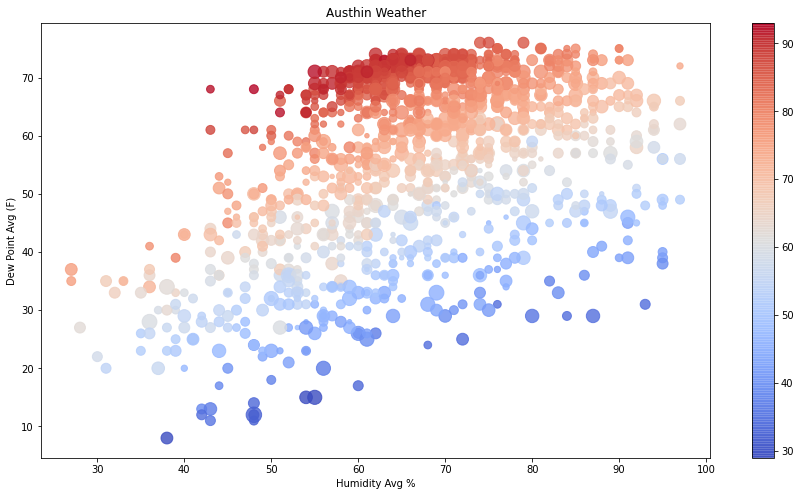

In [ ]:
df['HumidityAvgPercent'].replace('-', np.nan, inplace=True)
df['DewPointAvgF'].replace('-', np.nan, inplace=True)
df['WindAvgMPH'].replace('-', np.nan, inplace=True)

df['HumidityAvgPercent'].fillna(method='ffill',inplace=True)
df['DewPointAvgF'].fillna(method='ffill',inplace=True)
df['WindAvgMPH'].fillna(method='ffill',inplace=True)

x = df['HumidityAvgPercent'].astype(float)
y = df['DewPointAvgF'].astype(float)
area = df['WindAvgMPH'].astype(float).multiply(other=20)

fig, ax = plt.subplots(figsize=(15,8))
sc = ax.scatter(x, y, c = df['TempAvgF'], cmap='coolwarm', s=area, alpha=0.8)
plt.colorbar(sc)
ax.set_xlabel('Humidity Avg %')
ax.set_ylabel('Dew Point Avg (F)')
ax.set_title('Austhin Weather')

"""
Suatu tempat jarang mengalami kondisi titik saturasi yang rendah, 
dibuktikan dengan sedikitnya point/titik yang ada di rage nilai saturasi antara 0-40.

Sebaliknya, daerah tersebut lebih banyak mengalami kondisi dimana nilai titik saturasi besar. 
Ditandai dengan banyaknya scatter di range nilai titik saturasi 40-70. 
Tempat tersebut juga cenderung memiliki temperatur yang tinggi dengan 
nilai kelembaban udara berada pada range 50-70%

"""